#INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIAS E TECNOLOGIAS DE ALAGOAS
##ENGENHARIA CIVIL


### SAMYLE CLÁUDIA DOS SANTOS FARIAS



##  Atividade de mecânica dos Sólidos III _ AC-002



# 🛠️ Resolução: Flexão Composta
## Enunciado do Problema
Determinar as tensões nos pontos A, B, C e D, e a linha neutra


---

## 1. Dados Geométricos e de Carregamento

### 1.1. Geometria da Seção

* **Força Normal ($P$):** $4.8 \, \text{kN}$ (Compressão, na direção $-\text{x}$)
* **Largura da Seção ($b$):** $120 \, \text{mm}$ (paralela ao eixo $z$)
* **Altura da Seção ($h$):** $80 \, \text{mm}$ (paralela ao eixo $y$)
* **Excentricidade em $y$ ($e_y$):** $25 \, \text{mm}$ (distância do eixo $z$)
* **Excentricidade em $z$ ($e_z$):** $40 \, \text{mm}$ (distância do eixo $y$)

A fórmula da tensão normal ($\sigma_x$) para flexão composta oblíqua é:
$$\sigma_x(y, z) = \frac{N}{A} + \frac{M_y \cdot z}{I_y} - \frac{M_z \cdot y}{I_z}$$

---



## 1. **Propriedades Geométricas**

In [18]:
import numpy as np

# 1. Dados e Conversões (N e m)
# ---
b = 120.0     # Largura (paralela a z) em mm
h = 80.0      # Altura (paralela a y) em mm
P_kN = 4.8    # Força aplicada em kN
e_y_mm = -25.0 # Excentricidade em y (distância do eixo z) em mm
e_z_mm = 40.0 # Excentricidade em z (distância do eixo y) em mm

P = P_kN * 1000.0  # Força em Newtons (N)
b_m = b / 1000.0   # Largura em metros (m)
h_m = h / 1000.0   # Altura em metros (m)
e_y = e_y_mm / 1000.0 # Excentricidade em y (m)
e_z = e_z_mm / 1000.0 # Excentricidade em z (m)

# 2. Propriedades Geométricas
# ---
A = b_m * h_m  # Área da seção (m²)
Iz = b_m * h_m**3 / 12.0  # Momento de Inércia em relação a z (m⁴)
Iy = h_m * b_m**3 / 12.0  # Momento de Inércia em relação a y (m⁴)

# 3. Esforços Internos no Centroide
N = -P  # Compressão, negativo

# Mz = P * e_y (Momento em torno de z, devido à excentricidade em y)
Mz = -P * e_y
# My = -P * e_z (Momento em torno de y, devido à excentricidade em z. Sinal negativo pela convenção)
My = P * e_z

# Imprimir Resumo
print("--- Propriedades e Esforços ---")
print(f"Área (A): {A*1e6:.2f} mm²")
print(f"Iz: {Iz:.4e} m⁴ | Iy: {Iy:.4e} m⁴")
print(f"N (Força Normal): {N:.2f} N")
print(f"Mz (Momento em z): {Mz:.2f} N.m")
print(f"My (Momento em y): {My:.2f} N.m")

--- Propriedades e Esforços ---
Área (A): 9600.00 mm²
Iz: 5.1200e-06 m⁴ | Iy: 1.1520e-05 m⁴
N (Força Normal): -4800.00 N
Mz (Momento em z): 120.00 N.m
My (Momento em y): 192.00 N.m


# 2. **Cálculo das Tensões nos Pontos**

In [25]:
def calcular_tensao(y, z, N, A, My, Iy, Mz, Iz):
    """
    Calcula a tensão normal total (em Pa).
    A tensão é convertida para MPa no output.
    """
    sigma_normal = N / A
    sigma_flexao_y = My * z / Iy
    sigma_flexao_z = -Mz * y / Iz

    sigma_total = sigma_normal + sigma_flexao_y + sigma_flexao_z
    return sigma_total * 1e-6 # Retorna em MPa

# Coordenadas dos pontos (a partir do centroide O)
y_max = h_m / 2.0  # 0.04 m
z_max = b_m / 2.0  # 0.06 m

pontos = {
    'A': (y_max, -z_max),  # y = +h/2, z = -b/2
    'B': (y_max, z_max),    # y = +h/2, z = +b/2
    'C': (-y_max, z_max),  # y = -h/2, z = +b/2
    'D': (-y_max, -z_max) # y = -h/2, z = -b/2
}

print("--- 4. Tensões Calculadas (MPa) ---")
print("| Ponto | y (mm) | z (mm) | Tensão Total (MPa) | Natureza |")
print("|:-----:|:------:|:------:|:------------------:|:--------:|")

tensoes = {}
for nome, (y, z) in pontos.items():
    sigma_MPa = calcular_tensao(y, z, N, A, My, Iy, Mz, Iz)
    tensoes[nome] = sigma_MPa
    natureza = "Compressão" if sigma_MPa < 0 else "Tração"

    print(f"| {nome} | {y*1000:.0f} | {z*1000:.0f} | {sigma_MPa:.2f} | {natureza} |")

--- 4. Tensões Calculadas (MPa) ---
| Ponto | y (mm) | z (mm) | Tensão Total (MPa) | Natureza |
|:-----:|:------:|:------:|:------------------:|:--------:|
| A | 40 | -60 | -2.44 | Compressão |
| B | 40 | 60 | -0.44 | Compressão |
| C | -40 | 60 | 1.44 | Tração |
| D | -40 | -60 | -0.56 | Compressão |


# 3.**Cálculo da Linha Neutra (LN)**

In [30]:
# 5. Cálculo da Linha Neutra (LN)
# A equação da LN é: N/A + (My/Iy)*z - (Mz/Iz)*y = 0

C1 = N / A       # Termo de Força Normal (N/A)
C2 = My / Iy     # Coeficiente de z (My/Iy)
C3 = Mz / Iz     # Coeficiente de y (Mz/Iz)

# Expressando y em função de z: y = (C1/C3) + (C2/C3)*z
angular = C2 / C3
intercepto = C1 / C3

print("--- 5. Linha Neutra ---")
print("A LN é a linha onde a tensão é zero.")
print(f"Termos: C1={C1:.2f} | C2={C2:.2f} | C3={C3:.2f}")

# Exibir a equação
print("\nEquação da LN (em metros):")
print(f"y = ({intercepto:.4f}) + ({angular:.4f}) * z")

# Posição nos eixos para plotagem (em mm)
y_intercepto_mm = intercepto * 1000
z_intercepto_mm = -C1 / C2 * 1000 if C2 != 0 else np.inf # Intercepto em z (fazendo y=0)

print(f"\nIntercepto no eixo y (z=0): y = {y_intercepto_mm:.2f} mm")
print(f"Intercepto no eixo z (y=0): z = {z_intercepto_mm:.2f} mm")

--- 5. Linha Neutra ---
A LN é a linha onde a tensão é zero.
Termos: C1=-500000.00 | C2=16666666.67 | C3=23437500.00

Equação da LN (em metros):
y = (-0.0213) + (0.7111) * z

Intercepto no eixo y (z=0): y = -21.33 mm
Intercepto no eixo z (y=0): z = 30.00 mm


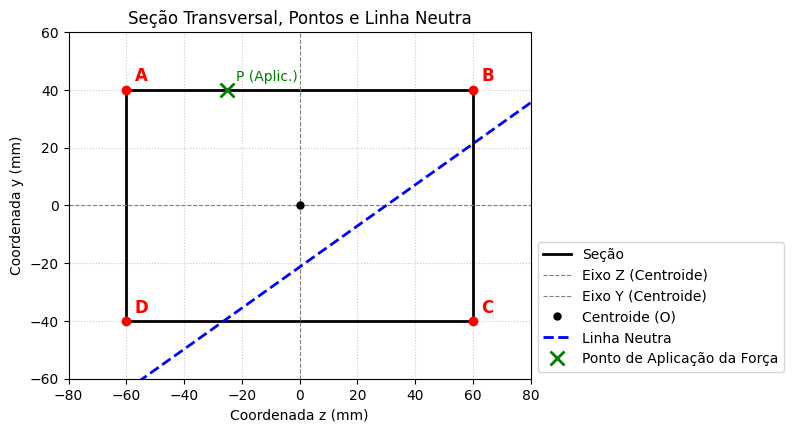

In [31]:
import matplotlib.pyplot as plt
# --- Configuração do Plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# ---  Desenhar a Seção Retangular ---
# Coordenadas dos vértices para o retângulo (anti-horário a partir do canto inferior esquerdo)
secao_z = [-z_max, z_max, z_max, -z_max, -z_max] # z-coords
secao_y = [-y_max, -y_max, y_max, y_max, -y_max] # y-coords

ax.plot(np.array(secao_z)*1000, np.array(secao_y)*1000, 'k-', linewidth=2, label='Seção') # 'k-' = linha preta

# --- Desenhar os Eixos do Centroide ---
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Eixo Z (Centroide)')
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8, label='Eixo Y (Centroide)')
ax.plot(0, 0, 'ko', markersize=5, label='Centroide (O)')

# ---  Desenhar e Rotular os Pontos A, B, C, D ---
for nome, (y_coord, z_coord) in pontos.items():
    ax.plot(z_coord*1000, y_coord*1000, 'ro', markersize=6) # 'ro' = ponto vermelho
    ax.text(z_coord*1000 + 3, y_coord*1000 + 3, nome, fontsize=12, color='red', weight='bold')

# ---  Desenhar a Linha Neutra ---
# Definir um intervalo de z que cubra a seção e um pouco mais
z_ln = np.linspace(-z_max * 2, z_max * 2, 100)
y_ln = intercepto + angular * z_ln

ax.plot(z_ln*1000, y_ln*1000, 'b--', linewidth=2, label='Linha Neutra') # 'b--' = linha azul tracejada

# ---  Desenhar o Ponto de Aplicação da Força (P) ---
# A força é aplicada em (y_excentricidade, z_excentricidade) no plano da seção
ax.plot(e_y*1000, e_z*1000, 'gx', markersize=10, mew=2, label='Ponto de Aplicação da Força')
ax.text(e_y*1000 + 3, e_z*1000 + 3, 'P (Aplic.)', fontsize=10, color='green')


# ---  Configurações Finais do Gráfico ---
ax.set_xlabel('Coordenada z (mm)')
ax.set_ylabel('Coordenada y (mm)')
ax.set_title('Seção Transversal, Pontos e Linha Neutra')
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0)) # Mover legenda para fora do plot
ax.set_aspect('equal', adjustable='box') # Garantir que os eixos tenham a mesma escala

# Ajustar limites para incluir toda a LN e o ponto de aplicação
# Ajusta para os limites da seção + uma margem
margin_z = z_max * 0.5
margin_y = y_max * 0.5
ax.set_xlim([-z_max*1000 - 20, z_max*1000 + 20])
ax.set_ylim([-y_max*1000 - 20, y_max*1000 + 20])


plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()